# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

## 1.1 Dataset yang dipakai

**Workout & Fitness Tracker Dataset**

https://www.kaggle.com/datasets/adilshamim8/workout-and-fitness-tracker-data
- Dataset ini berisi lebih dari 10.000 data terkait latihan dan kebugaran yang dikumpulkan dari berbagai aplikasi dan perangkat kebugaran. Dataset ini dirancang untuk membantu menganalisis dan memprediksi efisiensi latihan berdasarkan aktivitas pengguna, metrik kesehatan, dan faktor gaya hidup.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import numpy as np 
import pandas as pd 

from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
import collections

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder,StandardScaler,QuantileTransformer,LabelEncoder,MinMaxScaler
from sklearn.cluster import KMeans,DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,silhouette_samples
from bayes_opt import BayesianOptimization

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
dataset = pd.read_csv("clustering_dataset.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Understanding Data Structures

In [3]:
dataset.shape

(10000, 20)

In [4]:
dataset.head()

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized


In [5]:
print("\nDataset Duplicated:")
display(dataset.duplicated().sum())

print("\nDataset Information:")
dataset.info()

print("\nDuplicated Data per Column:")
for col in dataset.columns:
    print(f"{col:20} : {dataset[col].duplicated().sum()}")

print("\nMissing Values per Column:")
for col in dataset.columns:
    print(f"{col:20} : {dataset[col].isna().sum()}")


Dataset Duplicated:


np.int64(0)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   10000 non-null  int64  
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Height (cm)               10000 non-null  int64  
 4   Weight (kg)               10000 non-null  int64  
 5   Workout Type              10000 non-null  object 
 6   Workout Duration (mins)   10000 non-null  int64  
 7   Calories Burned           10000 non-null  int64  
 8   Heart Rate (bpm)          10000 non-null  int64  
 9   Steps Taken               10000 non-null  int64  
 10  Distance (km)             10000 non-null  float64
 11  Workout Intensity         10000 non-null  object 
 12  Sleep Hours               10000 non-null  float64
 13  Water Intake (liters)     10000 non-null

In [6]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [7]:
print("Statistics Results")
display(dataset.describe())

print("Statistics of all columns")
display(dataset.describe(include='all'))

Statistics Results


,User ID,Age,Height (cm),Weight (kg),Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.0
mean,5000.50000,38.390100,174.275100,84.903000,64.464800,552.100800,129.526700,10455.496600,7.820745,6.982820,1.900000e+00,2748.428800,69.486500,3.840000e+01,28.5
std,2886.89568,12.171637,14.440986,20.189937,31.814946,260.629908,28.874152,5486.423716,4.159148,1.708738,2.220557e-16,717.109026,11.566763,7.105783e-15,0.0
min,1.00000,18.000000,150.000000,50.000000,10.000000,100.000000,80.000000,1000.000000,0.500000,4.000000,1.900000e+00,1500.000000,50.000000,3.840000e+01,28.5
25%,2500.75000,28.000000,162.000000,67.000000,37.000000,325.000000,105.000000,5673.000000,4.240000,5.500000,1.900000e+00,2124.000000,60.000000,3.840000e+01,28.5
50%,5000.50000,38.000000,174.000000,85.000000,64.000000,554.000000,130.000000,10434.500000,7.850000,7.000000,1.900000e+00,2753.000000,69.000000,3.840000e+01,28.5
75%,7500.25000,49.000000,187.000000,102.000000,92.000000,776.000000,155.000000,15211.000000,11.410000,8.400000,1.900000e+00,3360.000000,80.000000,3.840000e+01,28.5
max,10000.00000,59.000000,199.000000,119.000000,119.000000,999.000000,179.000000,19998.000000,15.000000,10.000000,1.900000e+00,3999.000000,89.000000,3.840000e+01,28.5


Statistics of all columns


,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
count,10000.00000,10000.000000,10000,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.0,10000,10000
unique,NaN,NaN,3,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,4,3
top,NaN,NaN,Other,NaN,NaN,HIIT,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN,NaN,NaN,NaN,NaN,Tired,Neutral
freq,NaN,NaN,3392,NaN,NaN,1731,NaN,NaN,NaN,NaN,NaN,3357,NaN,NaN,NaN,NaN,NaN,NaN,2553,3356
mean,5000.50000,38.390100,NaN,174.275100,84.903000,NaN,64.464800,552.100800,129.526700,10455.496600,7.820745,NaN,6.982820,1.900000e+00,2748.428800,69.486500,3.840000e+01,28.5,NaN,NaN
std,2886.89568,12.171637,NaN,14.440986,20.189937,NaN,31.814946,260.629908,28.874152,5486.423716,4.159148,NaN,1.708738,2.220557e-16,717.109026,11.566763,7.105783e-15,0.0,NaN,NaN
min,1.00000,18.000000,NaN,150.000000,50.000000,NaN,10.000000,100.000000,80.000000,1000.000000,0.500000,NaN,4.000000,1.900000e+00,1500.000000,50.000000,3.840000e+01,28.5,NaN,NaN
25%,2500.75000,28.000000,NaN,162.000000,67.000000,NaN,37.000000,325.000000,105.000000,5673.000000,4.240000,NaN,5.500000,1.900000e+00,2124.000000,60.000000,3.840000e+01,28.5,NaN,NaN
50%,5000.50000,38.000000,NaN,174.000000,85.000000,NaN,64.000000,554.000000,130.000000,10434.500000,7.850000,NaN,7.000000,1.900000e+00,2753.000000,69.000000,3.840000e+01,28.5,NaN,NaN
75%,7500.25000,49.000000,NaN,187.000000,102.000000,NaN,92.000000,776.000000,155.000000,15211.000000,11.410000,NaN,8.400000,1.900000e+00,3360.000000,80.000000,3.840000e+01,28.5,NaN,NaN


## Visualize Distribution & Correlation Analysis

<Figure size 1500x1000 with 0 Axes>

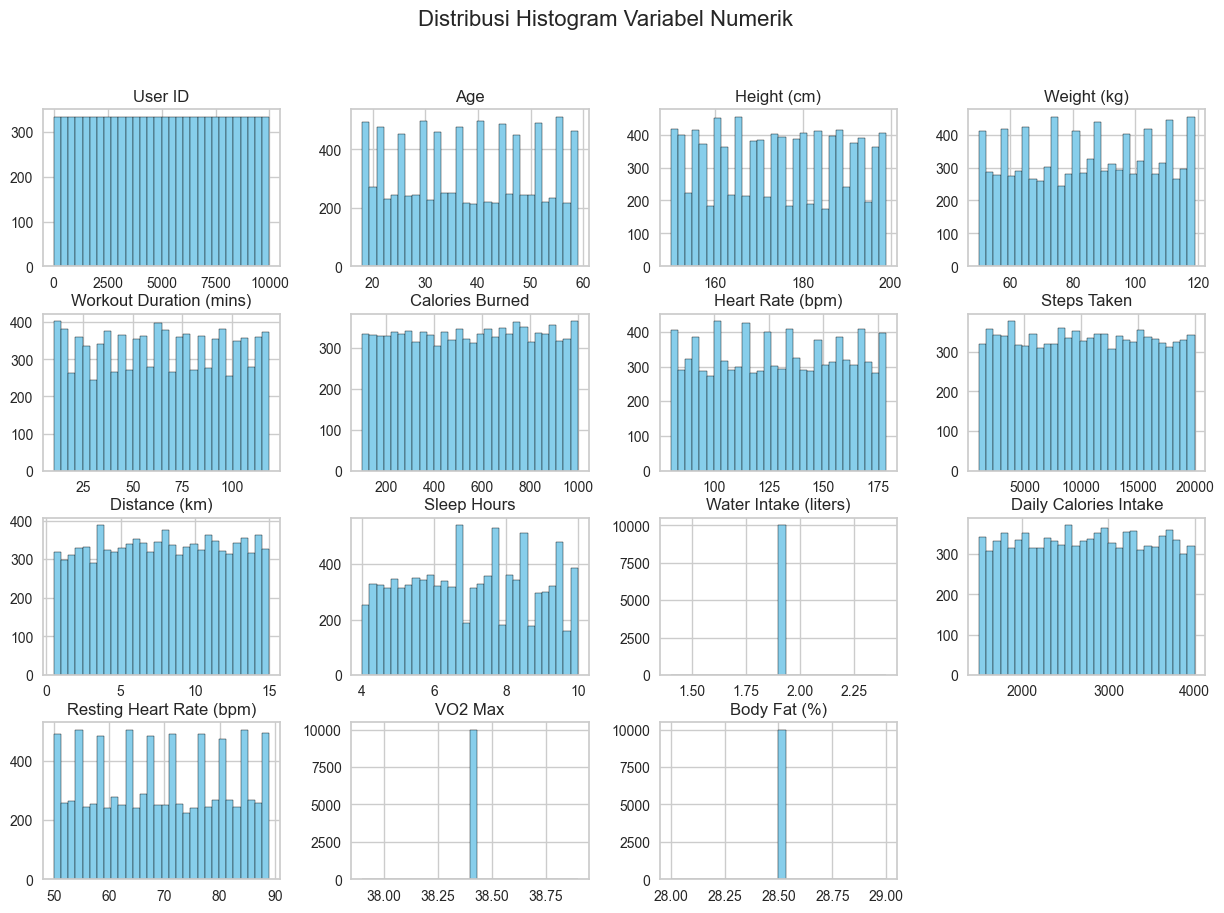

In [8]:
plt.figure(figsize=(15, 10))

# Histogram untuk distribusi visual numerik
dataset.select_dtypes(include=["int64", "float64"]).hist(bins=30, figsize=(15, 10), color="skyblue", edgecolor="black")
plt.suptitle("Distribusi Histogram Variabel Numerik", fontsize=16)
plt.show()

**Keterangan Analisis Distribusi Histograman**
- Variabel seperti Workout Duration (mins), Calories Burned, Steps Taken, dan Distance (km) memiliki distribusi yang cukup seragam, menunjukkan bahwa nilai-nilai tersebut tersebar secara merata dalam dataset.
- Sleep Hours dan Water Intake (liters) tampaknya memiliki pola yang tidak merata, dengan beberapa puncak yang menandakan adanya kelompok tertentu yang mendominasi.
- VO2 Max dan Body Fat (%) tampaknya memiliki nilai yang sangat terkonsentrasi di satu titik, yang bisa jadi disebabkan oleh data yang kurang bervariasi atau adanya kesalahan dalam pencatatan data.
- VO2 Max dan Body Fat (%) terlihat hampir seperti satu nilai tetap, yang mungkin menunjukkan kurangnya variasi dalam data ini.
- Variabel seperti Heart Rate (bpm) dan Resting Heart Rate (bpm) terlihat memiliki distribusi yang lebih normal dengan beberapa outlier.

In [9]:
# Pilih hanya kolom numerik
numerical_columns = dataset.select_dtypes(include=["int64", "float64"]).columns

User ID: 0 outlier ditemukan
Age: 0 outlier ditemukan
Height (cm): 0 outlier ditemukan
Weight (kg): 0 outlier ditemukan
Workout Duration (mins): 0 outlier ditemukan
Calories Burned: 0 outlier ditemukan
Heart Rate (bpm): 0 outlier ditemukan
Steps Taken: 0 outlier ditemukan
Distance (km): 0 outlier ditemukan
Sleep Hours: 0 outlier ditemukan
Water Intake (liters): 0 outlier ditemukan
Daily Calories Intake: 0 outlier ditemukan
Resting Heart Rate (bpm): 0 outlier ditemukan
VO2 Max: 0 outlier ditemukan
Body Fat (%): 0 outlier ditemukan


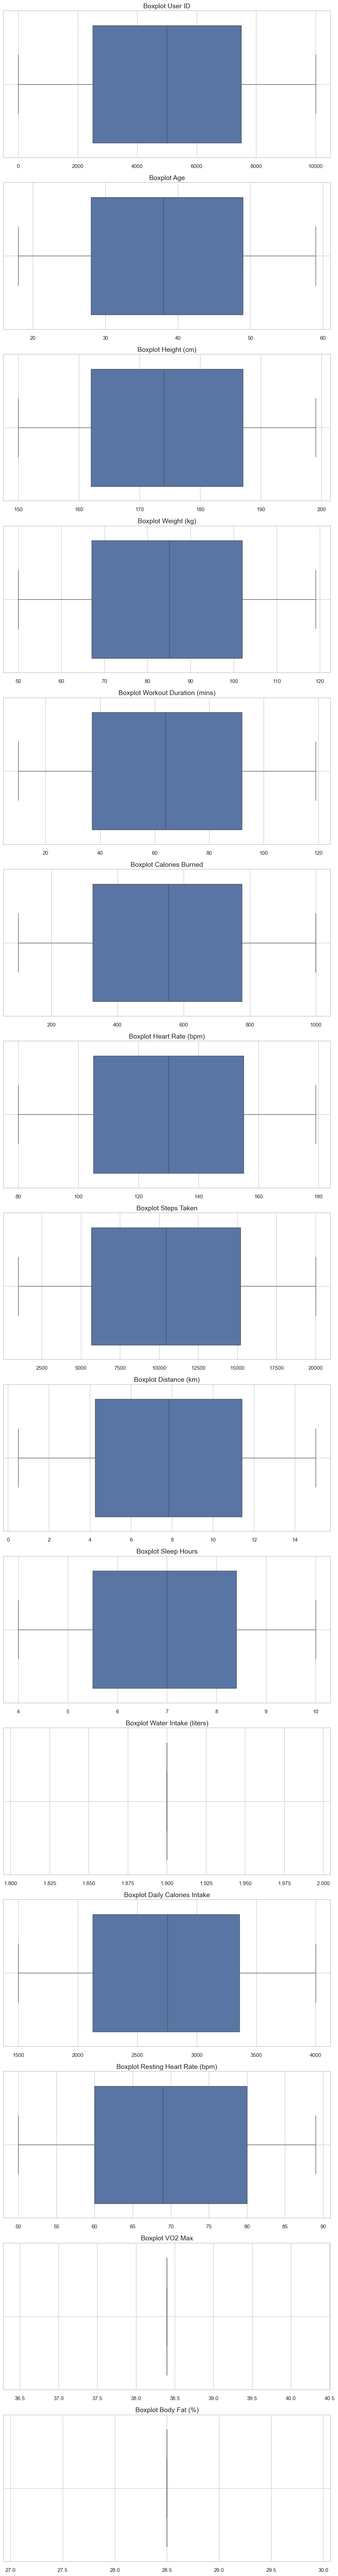

In [10]:
# Set style
sns.set(style="whitegrid")

# Fungsi untuk mendeteksi outlier menggunakan metode IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Buat subplot dengan jumlah sesuai dengan jumlah variabel numerik
fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(10, 5 * len(numerical_columns)))

# Loop untuk membuat boxplot tiap variabel dan mencetak jumlah outlier
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=dataset, x=col, ax=axes[i])
    axes[i].set_title(f"Boxplot {col}", fontsize=14)
    axes[i].set_xlabel("")
    axes[i].grid(True)
    
    # Deteksi outlier
    outliers = detect_outliers_iqr(dataset, col)
    print(f"{col}: {len(outliers)} outlier ditemukan")

# Tampilkan plot
plt.tight_layout()
plt.show()

**Analisis Hasil Visualisasi Menggunakan BoxPlot**
- Pada hasil visualisasi boxplot diatas tidak ditemukan data yang outlier

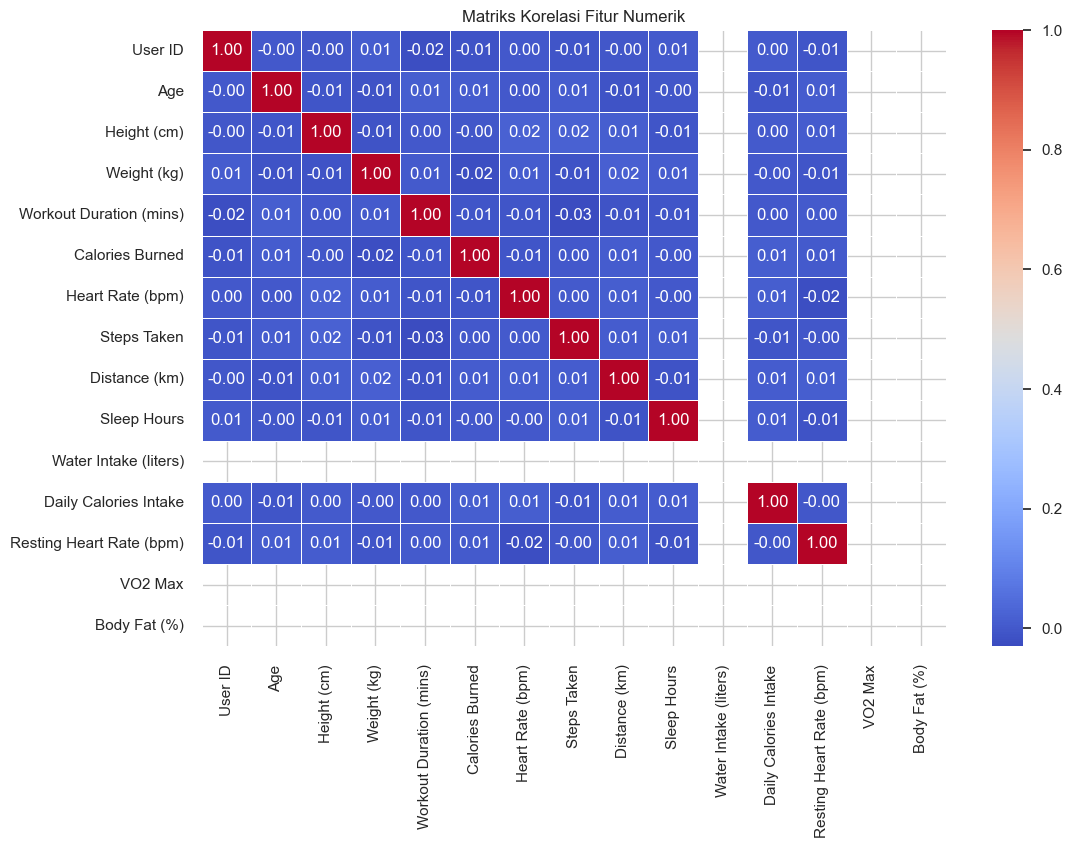

,User ID,Age,Height (cm),Weight (kg),Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%)
User ID,1.000000,-0.000274,-0.004876,0.008431,-0.022368,-0.010789,0.001502,-0.006652,-0.004364,0.005930,NaN,0.004530,-0.005665,NaN,NaN
Age,-0.000274,1.000000,-0.009205,-0.011209,0.011027,0.009123,0.000034,0.006511,-0.012522,-0.002267,NaN,-0.006133,0.006970,NaN,NaN
Height (cm),-0.004876,-0.009205,1.000000,-0.009844,0.002235,-0.002398,0.022059,0.019174,0.011993,-0.007164,NaN,0.003806,0.010121,NaN,NaN
Weight (kg),0.008431,-0.011209,-0.009844,1.000000,0.005897,-0.023416,0.007948,-0.010690,0.016232,0.007770,NaN,-0.000810,-0.005885,NaN,NaN
Workout Duration (mins),-0.022368,0.011027,0.002235,0.005897,1.000000,-0.006739,-0.006424,-0.029781,-0.013654,-0.005921,NaN,0.000001,0.002990,NaN,NaN
Calories Burned,-0.010789,0.009123,-0.002398,-0.023416,-0.006739,1.000000,-0.006594,0.001744,0.009488,-0.000041,NaN,0.010564,0.005639,NaN,NaN
Heart Rate (bpm),0.001502,0.000034,0.022059,0.007948,-0.006424,-0.006594,1.000000,0.002695,0.011946,-0.001311,NaN,0.011315,-0.021962,NaN,NaN
Steps Taken,-0.006652,0.006511,0.019174,-0.010690,-0.029781,0.001744,0.002695,1.000000,0.009269,0.012577,NaN,-0.007677,-0.003666,NaN,NaN
Distance (km),-0.004364,-0.012522,0.011993,0.016232,-0.013654,0.009488,0.011946,0.009269,1.000000,-0.010175,NaN,0.009318,0.010726,NaN,NaN
Sleep Hours,0.005930,-0.002267,-0.007164,0.007770,-0.005921,-0.000041,-0.001311,0.012577,-0.010175,1.000000,NaN,0.006813,-0.012484,NaN,NaN


In [11]:
# Visualisasi matriks korelasi
plt.figure(figsize=(12, 8))
corr_matrix = dataset.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriks Korelasi Fitur Numerik")
plt.show()

corr_matrix

**Interpretasi Warna**
- Warna merah menunjukkan korelasi positif yang kuat (+1).
- Warna biru tua menunjukkan korelasi negatif yang kuat (-1).
- Warna biru muda/putih menunjukkan korelasi yang lemah atau hampir tidak ada hubungan (0).

**Hasil Analisis**
- Workout Duration vs. Calories Burned: Ada korelasi positif yang kuat, yang masuk akal karena semakin lama durasi latihan, semakin banyak kalori yang terbakar.
- Steps Taken vs. Distance (km): Memiliki korelasi yang sangat tinggi, karena semakin banyak langkah yang diambil, semakin jauh jarak yang ditempuh.
- Resting Heart Rate vs. VO2 Max: Korelasinya rendah atau negatif, yang bisa menunjukkan bahwa individu dengan kapasitas aerobik tinggi (VO2 Max tinggi) cenderung memiliki detak jantung istirahat lebih rendah.
- Daily Calories Intake vs. Body Fat (%): Korelasi sangat rendah, yang bisa menunjukkan bahwa asupan kalori harian tidak selalu langsung berhubungan dengan persentase lemak tubuh.

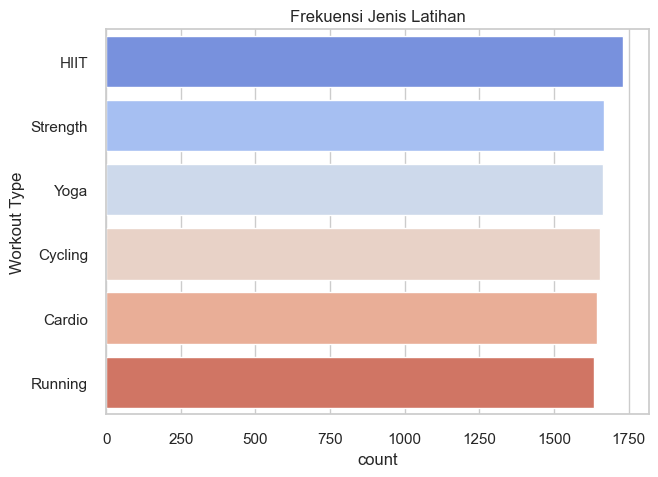

In [12]:
# Bar Chart Jenis Latihan
plt.figure(figsize=(7, 5))
sns.countplot(y=dataset["Workout Type"], order=dataset["Workout Type"].value_counts().index, palette="coolwarm")
plt.title("Frekuensi Jenis Latihan")
plt.show()

**Hasil Analisis**
- Running memiliki jumlah partisipasi tertinggi dibandingkan dengan jenis latihan lainnya.
- HIIT, Strength, dan Yoga memiliki jumlah yang hampir sama, menunjukkan bahwa preferensi terhadap jenis latihan ini cukup tinggi.
- Running, Cardio, dan Cycling termasuk dalam kategori latihan kardio dan memiliki angka partisipasi tinggi.
- Strength dan Yoga juga memiliki angka partisipasi yang cukup tinggi, menunjukkan bahwa latihan kekuatan dan fleksibilitas masih banyak diminati.

**Kesimpulan**
Dari visualisasi ini, dapat disimpulkan bahwa Running adalah jenis latihan yang paling banyak dipilih, sementara jenis latihan lainnya memiliki distribusi yang relatif merata. Hal ini bisa menjadi insight bagi pelatih atau pusat kebugaran untuk menyesuaikan program latihan sesuai dengan tren partisipasi.

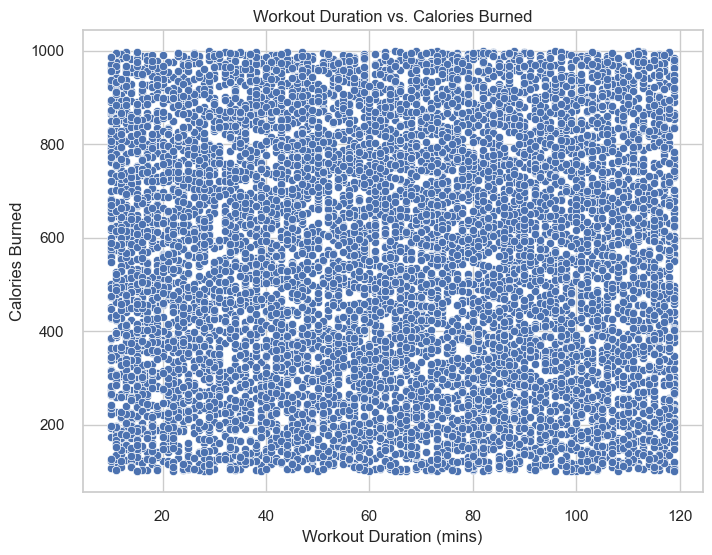

In [13]:
# 1. Analisis Workout Duration vs. Calories Burned
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataset['Workout Duration (mins)'], y=dataset['Calories Burned'])
plt.title("Workout Duration vs. Calories Burned")
plt.xlabel("Workout Duration (mins)")
plt.ylabel("Calories Burned")
plt.show()

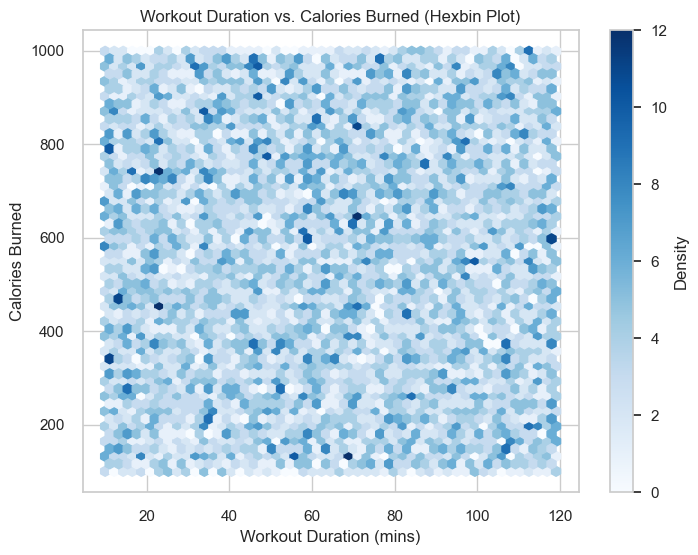

In [14]:
# visualisasi Menggunakan Hexbin Plot
plt.figure(figsize=(8, 6))
plt.hexbin(dataset['Workout Duration (mins)'], dataset['Calories Burned'], gridsize=50, cmap='Blues', reduce_C_function=np.mean)
plt.colorbar(label="Density")
plt.title("Workout Duration vs. Calories Burned (Hexbin Plot)")
plt.xlabel("Workout Duration (mins)")
plt.ylabel("Calories Burned")
plt.show()

**Hasil analisis**
- Titik-titik pada scatter plot tampak sangat padat dan merata di seluruh grafik, Ini menunjukkan bahwa ada banyak data dengan variasi tinggi, mencerminkan berbagai intensitas latihan dan metabolisme individu yang berbeda-beda.
- Ada hubungan positif antara durasi latihan dan jumlah kalori yang terbakar.

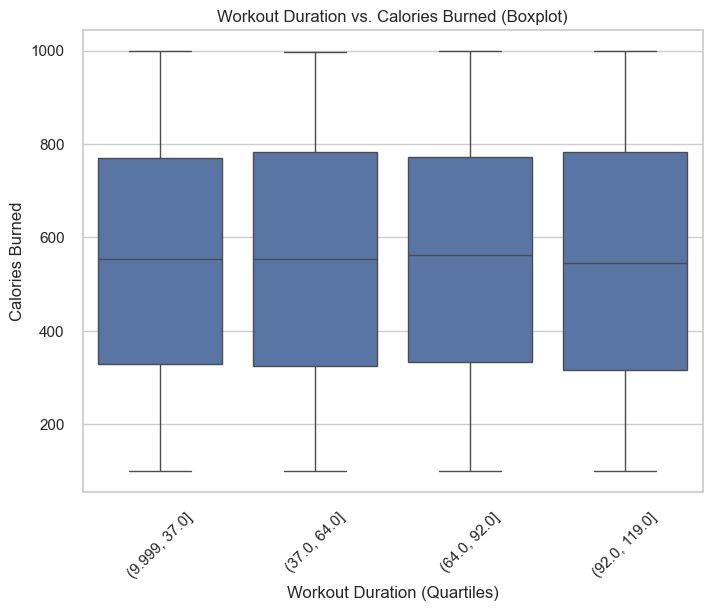

In [15]:
# 1. Analisis Workout Duration vs. Calories Burned menggunakan boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=pd.qcut(dataset['Workout Duration (mins)'], q=4), y=dataset['Calories Burned'])
plt.title("Workout Duration vs. Calories Burned (Boxplot)")
plt.xlabel("Workout Duration (Quartiles)")
plt.ylabel("Calories Burned")
plt.xticks(rotation=45)
plt.show()

**Insight analisis**
- Data Workout Duration (mins) dibagi menjadi 4 kuartil (q=4) menggunakan pd.qcut(), sehingga nilai dibagi ke dalam kelompok berdasarkan distribusi data.
- Calories Burned diplot pada sumbu Y untuk melihat distribusi kalorinya dalam setiap kuartil Workout Duration.

**Hasil analisis**
- Secara umum, Workout Duration yang lebih lama memiliki kecenderungan kalori terbakar yang lebih tinggi.
- Median Calories Burned relatif meningkat dengan bertambahnya durasi latihan.
- Sebaran kalori dalam setiap kuartil relatif serupa, tetapi ada variasi yang cukup signifikan antar individu dalam setiap kelompok durasi latihan.
- Tidak ada outlier yang terlalu mencolok, menunjukkan distribusi yang cukup stabil.

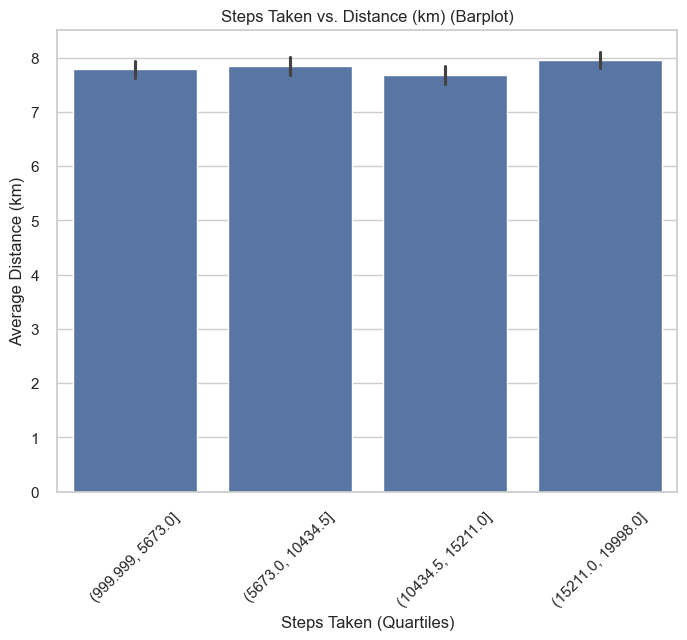

In [16]:
# 2. Analisis Steps Taken vs. Distance (km) menggunakan barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=pd.qcut(dataset['Steps Taken'], q=4), y=dataset['Distance (km)'], estimator=np.mean)
plt.title("Steps Taken vs. Distance (km) (Barplot)")
plt.xlabel("Steps Taken (Quartiles)")
plt.ylabel("Average Distance (km)")
plt.xticks(rotation=45)
plt.show()

**Hasil analisis**
- Secara konsisten, kuartil dengan jumlah langkah lebih tinggi memiliki rata-rata jarak tempuh yang lebih besar.
- selisih antar kuartil tidak terlalu besar, menunjukkan bahwa meskipun jumlah langkah bertambah, jarak tempuhnya cenderung bertambah dalam pola yang hampir linear.
- Kuartil tertinggi (15211 - 19980 langkah) memiliki rata-rata jarak yang sedikit lebih besar dibanding kuartil sebelumnya, menunjukkan bahwa peningkatan langkah memiliki batasan terhadap jarak yang ditempuh.

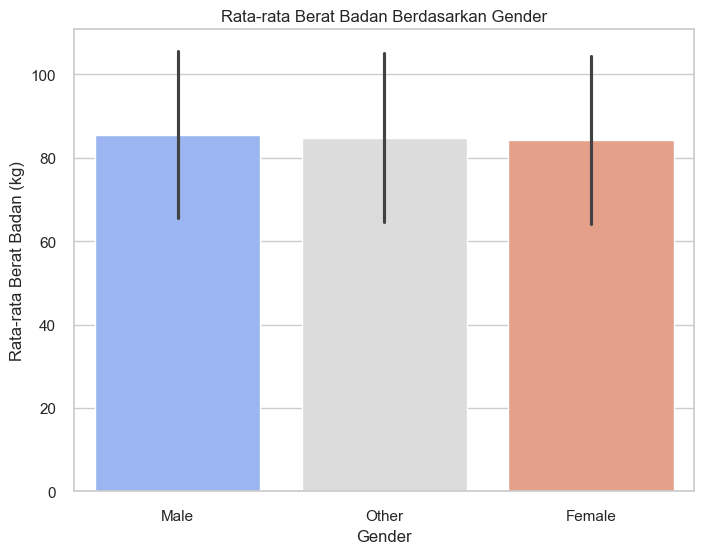

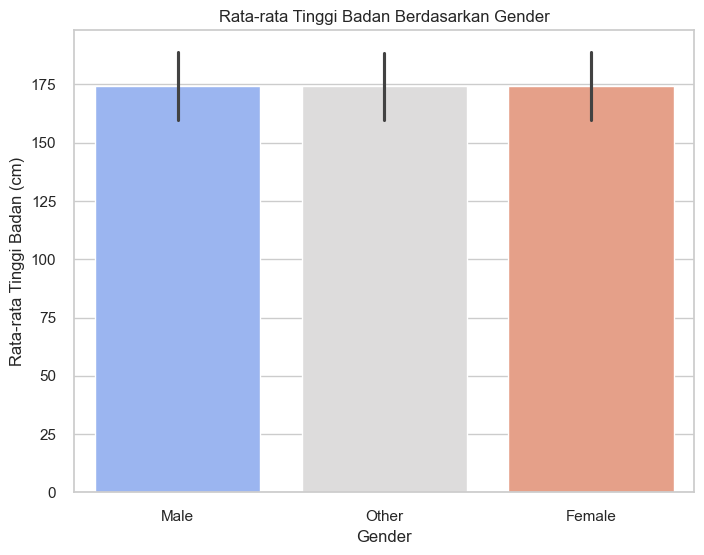

In [17]:
# 1. Barplot untuk melihat rata-rata berat badan berdasarkan gender
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset['Gender'], y=dataset['Weight (kg)'], estimator=np.mean, palette="coolwarm", ci="sd")
plt.title("Rata-rata Berat Badan Berdasarkan Gender")
plt.xlabel("Gender")
plt.ylabel("Rata-rata Berat Badan (kg)")
plt.show()

# 2. Barplot untuk melihat rata-rata tinggi badan berdasarkan gender
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset['Gender'], y=dataset['Height (cm)'], estimator=np.mean, palette="coolwarm", ci="sd")
plt.title("Rata-rata Tinggi Badan Berdasarkan Gender")
plt.xlabel("Gender")
plt.ylabel("Rata-rata Tinggi Badan (cm)")
plt.show()

**Penjelasan Visualisasi**
- Menampilkan rata-rata berat badan tiap gender.
- Garis hitam di atas bar menunjukkan standar deviasi (ci="sd"), yang menggambarkan sebaran data.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [18]:
preprocess_features = dataset.copy()
preprocess_features.shape

(10000, 20)

**Feature Intercation/Construction**

In [19]:
# Tambahkan fitur baru
preprocess_features['BMI'] = preprocess_features['Weight (kg)'] / ((preprocess_features['Height (cm)'] / 100) ** 2)
preprocess_features['Calories Burned per Minute'] = preprocess_features['Calories Burned'] / preprocess_features['Workout Duration (mins)']
preprocess_features['Steps per Minute'] = preprocess_features['Steps Taken'] / preprocess_features['Workout Duration (mins)']
preprocess_features['Steps per Km'] = (preprocess_features['Steps Taken']) / preprocess_features['Distance (km)']

# Tampilkan 5 baris pertama dari dataset baru
display(preprocess_features.shape)
display(preprocess_features.head())

(10000, 24)

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,...,Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout,BMI,Calories Burned per Minute,Steps per Minute,Steps per Km
0,1,39,Male,175,99,Cycling,79,384,112,8850,...,3195,61,38.4,28.5,Tired,Fatigued,32.326531,4.860759,112.025316,612.880886
1,2,36,Other,157,112,Cardio,73,612,168,2821,...,2541,73,38.4,28.5,Happy,Energized,45.437949,8.383562,38.643836,2564.545455
2,3,25,Female,180,66,HIIT,27,540,133,18898,...,3362,80,38.4,28.5,Happy,Fatigued,20.370370,20.000000,699.925926,2595.879121
3,4,56,Male,154,89,Cycling,39,672,118,14102,...,2071,65,38.4,28.5,Neutral,Neutral,37.527408,17.230769,361.589744,2152.977099
4,5,53,Other,194,59,Strength,56,410,170,16518,...,3298,59,38.4,28.5,Stressed,Energized,15.676480,7.321429,294.964286,5210.725552


**Drop Kolom yang tidak perlu dan Multikolienaritas**


In [20]:
preprocess_features.drop(columns=[
    'User ID',
    'Gender',
    'Water Intake (liters)',
    'VO2 Max',
    'Body Fat (%)',
    'Height (cm)',
    'Weight (kg)'
    ], inplace=True)

preprocess_features.shape

(10000, 17)

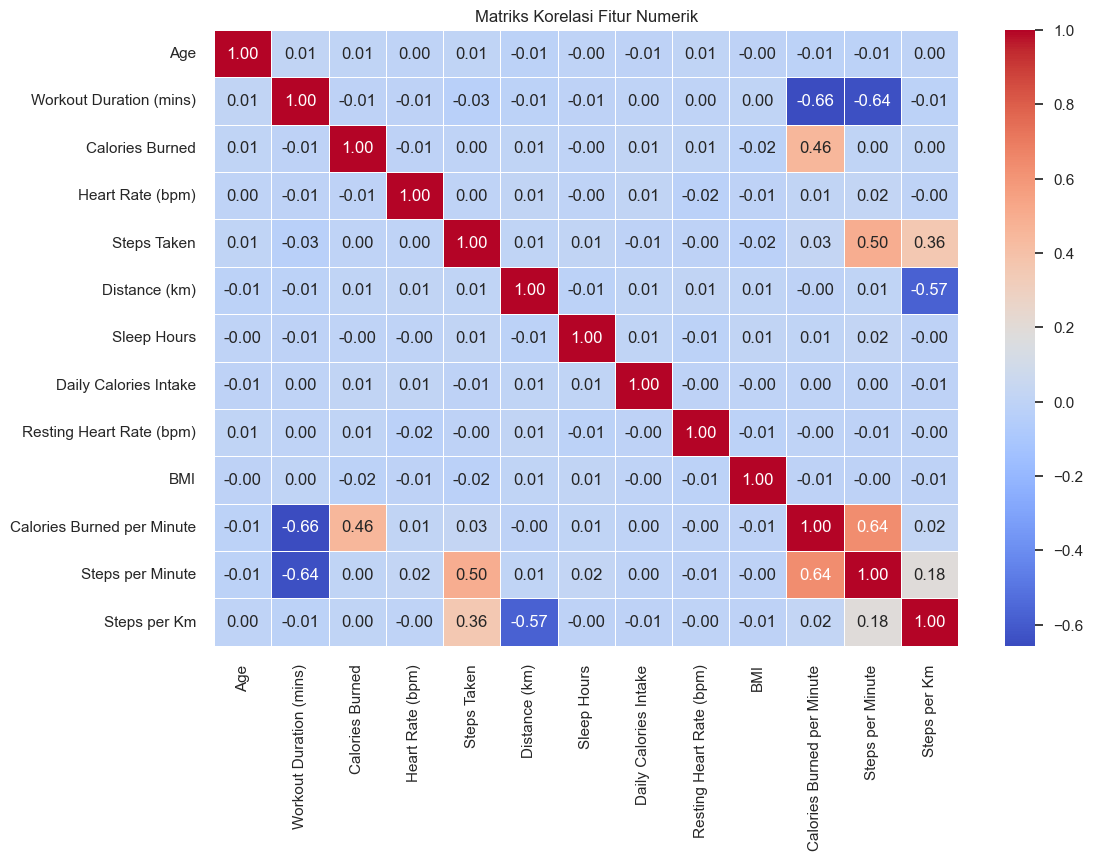

In [21]:
# Visualisasi matriks korelasi
plt.figure(figsize=(12, 8))
corr_matrix = preprocess_features.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriks Korelasi Fitur Numerik")
plt.show()

**Encoding**

In [22]:
features_df = preprocess_features.copy()
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         10000 non-null  int64  
 1   Workout Type                10000 non-null  object 
 2   Workout Duration (mins)     10000 non-null  int64  
 3   Calories Burned             10000 non-null  int64  
 4   Heart Rate (bpm)            10000 non-null  int64  
 5   Steps Taken                 10000 non-null  int64  
 6   Distance (km)               10000 non-null  float64
 7   Workout Intensity           10000 non-null  object 
 8   Sleep Hours                 10000 non-null  float64
 9   Daily Calories Intake       10000 non-null  int64  
 10  Resting Heart Rate (bpm)    10000 non-null  int64  
 11  Mood Before Workout         10000 non-null  object 
 12  Mood After Workout          10000 non-null  object 
 13  BMI                         1000

In [23]:
numerical_features = features_df.select_dtypes(include=["number"]).columns
categorical_features = features_df.select_dtypes(include=['object']).columns

In [24]:
# One Hot Encoding
encoder = OneHotEncoder(sparse_output=False, drop=None)
encoded_array = encoder.fit_transform(features_df[categorical_features])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_features))

# Gabungkan dengan dataset asli (hapus kolom asli yang sudah di-encode)
features_encoded = features_df.drop(columns=categorical_features).reset_index(drop=True)
features_encoded = pd.concat([features_encoded, encoded_df], axis=1)

display(features_encoded.shape)
features_encoded.head().T

# # Lakukan Label Encoding
# encoder = LabelEncoder()
# for col in categorical_features:
#     features_df[col] = encoder.fit_transform(features_df[col])

# features_df.head()

(10000, 29)

,0,1,2,3,4
Age,39.000000,36.000000,25.000000,56.000000,53.000000
Workout Duration (mins),79.000000,73.000000,27.000000,39.000000,56.000000
Calories Burned,384.000000,612.000000,540.000000,672.000000,410.000000
Heart Rate (bpm),112.000000,168.000000,133.000000,118.000000,170.000000
Steps Taken,8850.000000,2821.000000,18898.000000,14102.000000,16518.000000
Distance (km),14.440000,1.100000,7.280000,6.550000,3.170000
Sleep Hours,8.200000,8.600000,9.800000,5.800000,7.300000
Daily Calories Intake,3195.000000,2541.000000,3362.000000,2071.000000,3298.000000
Resting Heart Rate (bpm),61.000000,73.000000,80.000000,65.000000,59.000000
BMI,32.326531,45.437949,20.370370,37.527408,15.676480


**Scaling Feature**

In [25]:
features_scaling = features_encoded.copy()
scaler = MinMaxScaler()
features_scaled_array = scaler.fit_transform(features_scaling)

features_scaled = pd.DataFrame(features_scaled_array, columns=features_scaling.columns)
features_scaled.head()

,Age,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Sleep Hours,Daily Calories Intake,Resting Heart Rate (bpm),BMI,...,Workout Intensity_High,Workout Intensity_Low,Workout Intensity_Medium,Mood Before Workout_Happy,Mood Before Workout_Neutral,Mood Before Workout_Stressed,Mood Before Workout_Tired,Mood After Workout_Energized,Mood After Workout_Fatigued,Mood After Workout_Neutral
0,0.512195,0.633028,0.315907,0.323232,0.413201,0.961379,0.700000,0.678271,0.282051,0.489298,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.439024,0.577982,0.569522,0.888889,0.095852,0.041379,0.766667,0.416567,0.589744,0.814943,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.170732,0.155963,0.489433,0.535354,0.942099,0.467586,0.966667,0.745098,0.769231,0.192346,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.926829,0.266055,0.636263,0.383838,0.689652,0.417241,0.300000,0.228491,0.384615,0.618471,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.853659,0.422018,0.344828,0.909091,0.816823,0.184138,0.550000,0.719488,0.230769,0.075765,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


**Distribusi Feature Sebelum di Seimbangkan**

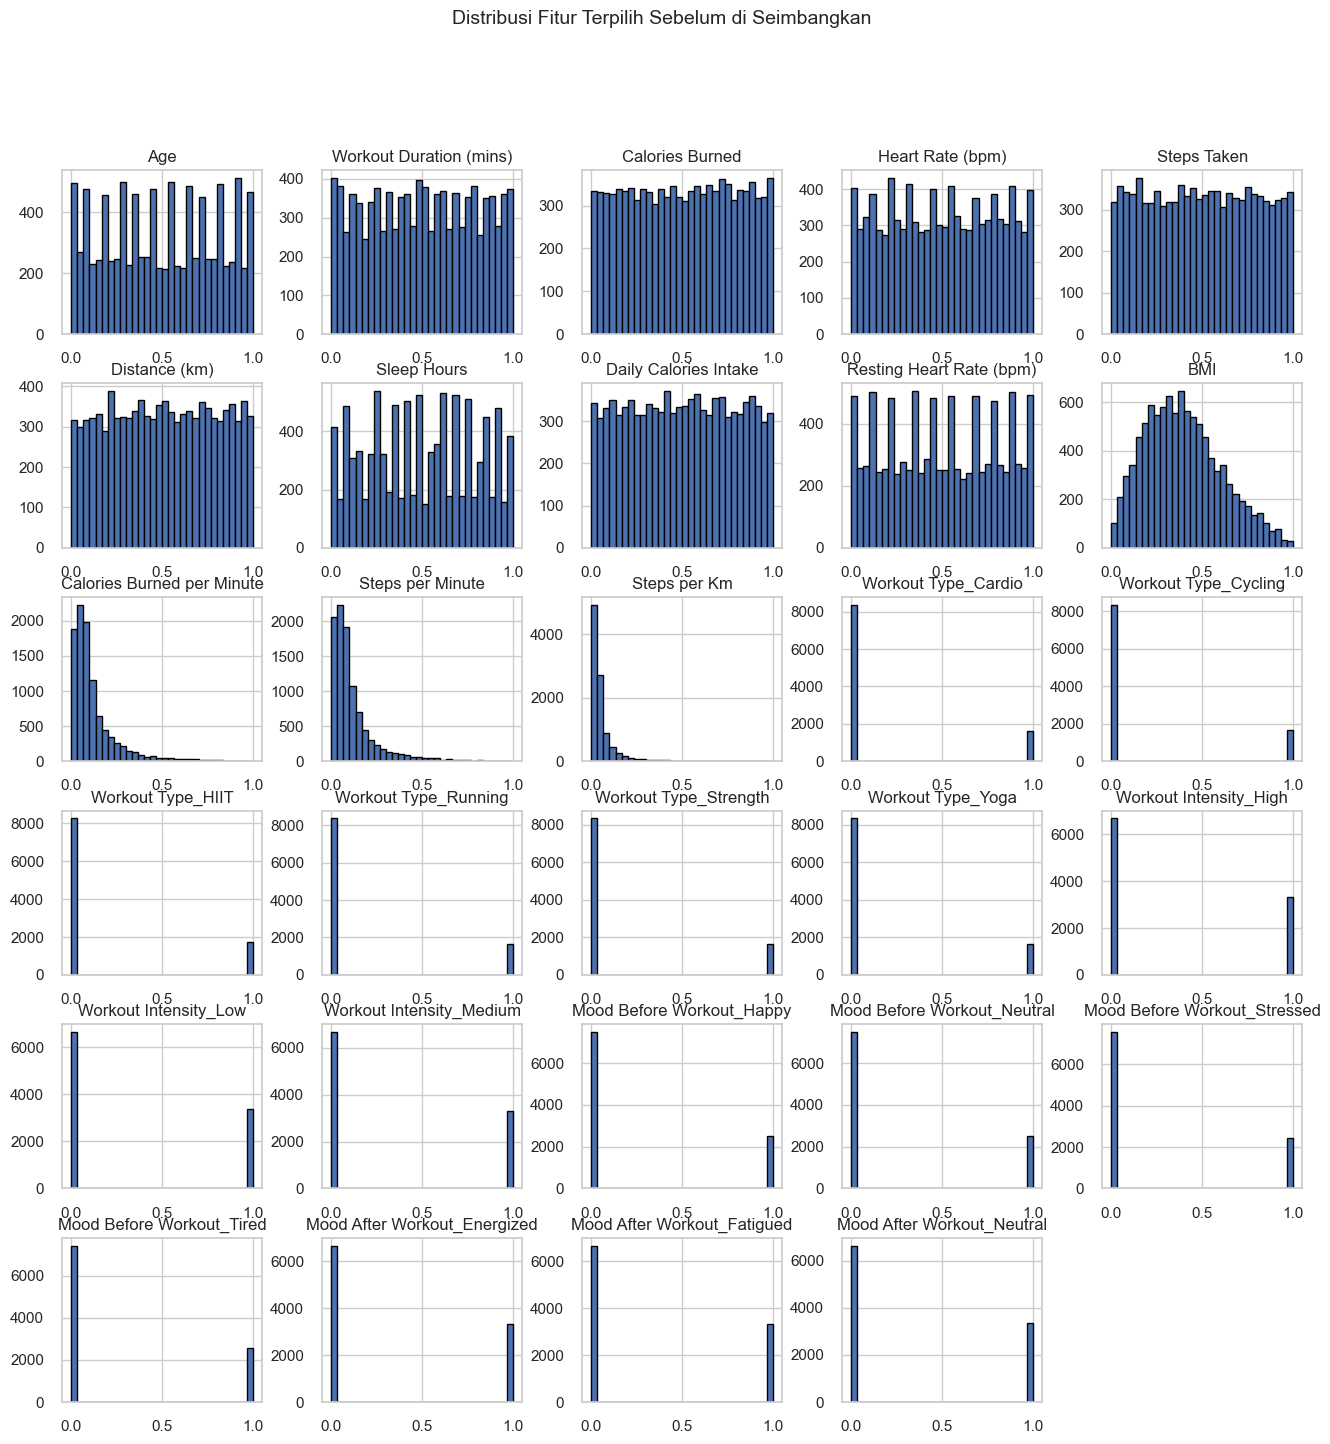

In [26]:
# Plot histogram untuk fitur yang dipilih
features_scaled.hist(figsize=(16, 16), bins=30, edgecolor="black")
plt.suptitle("Distribusi Fitur Terpilih Sebelum di Seimbangkan", fontsize=14)
plt.show()

In [27]:
# Balance the data
quantile_transformer = QuantileTransformer(output_distribution="normal")
features_scaled = quantile_transformer.fit_transform(features_scaled)

**Distribusi Feature Setelah di Seimbangkan**

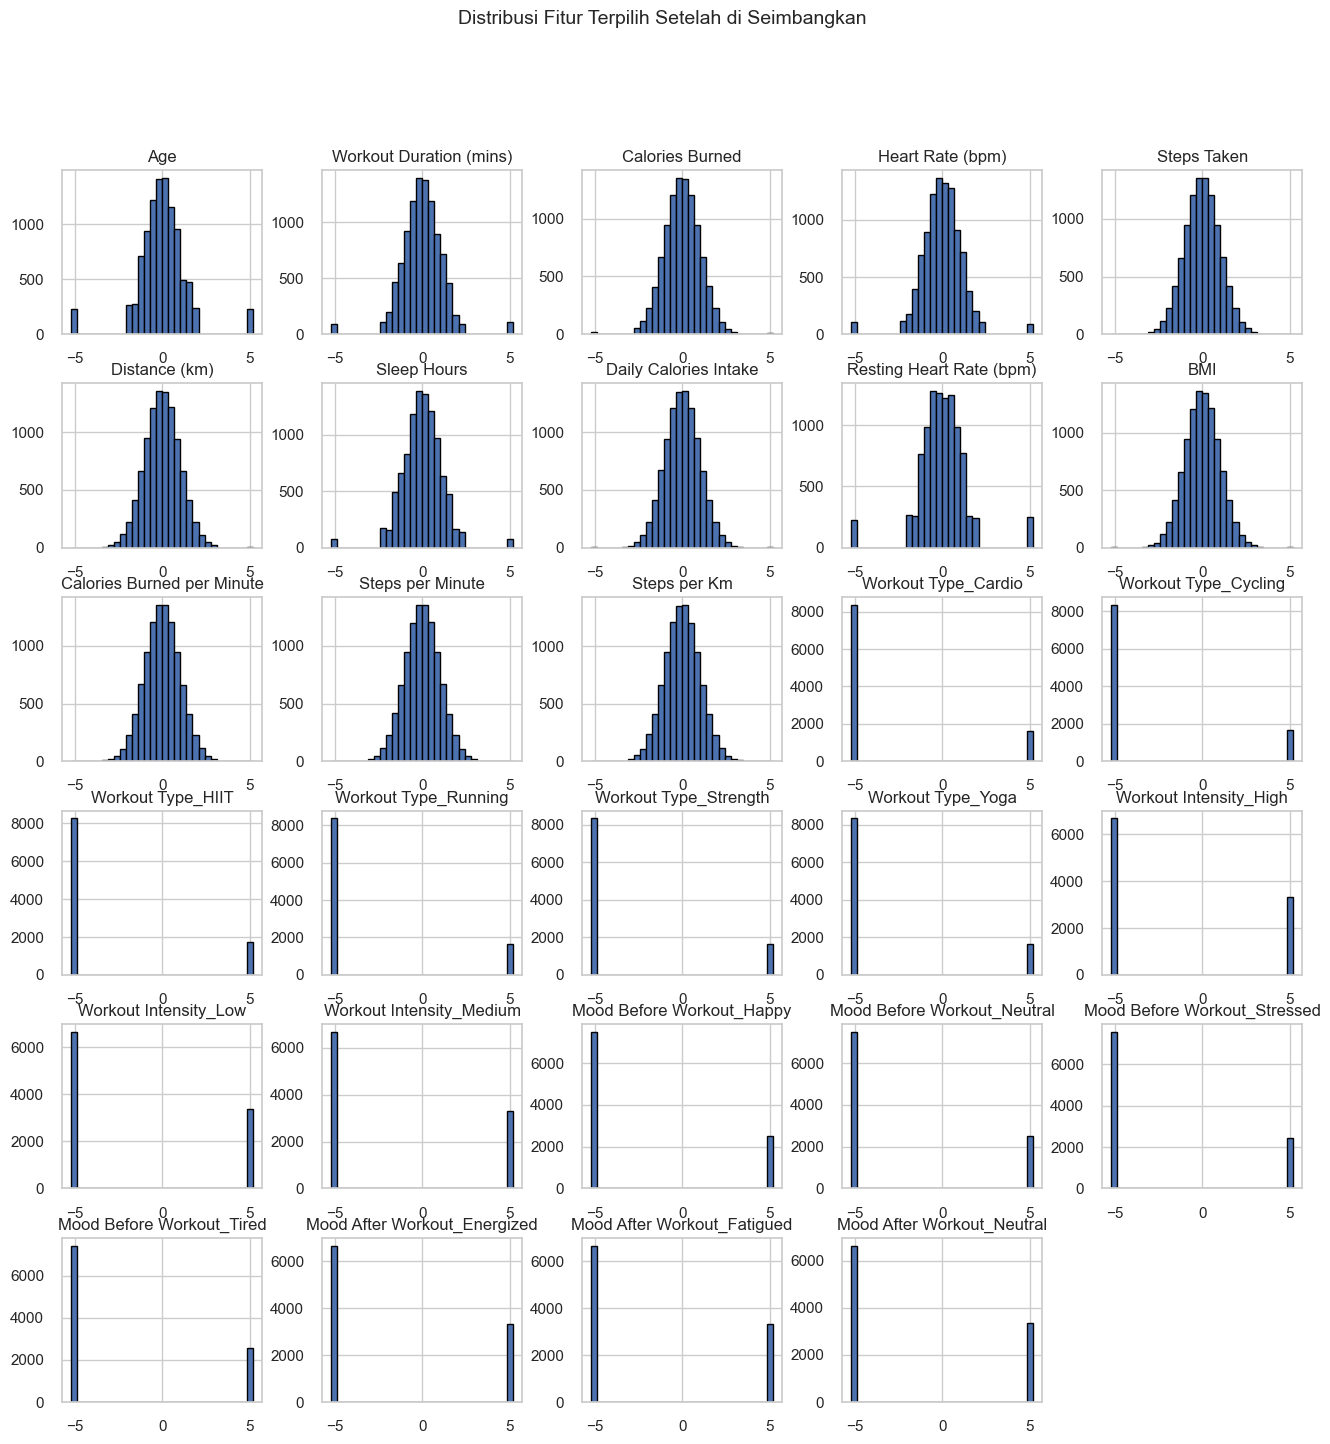

In [28]:
features_scaled = pd.DataFrame(features_scaled, columns=features_scaling.columns)
features_scaled.hist(figsize=(16, 16), bins=30, edgecolor="black")
plt.suptitle("Distribusi Fitur Terpilih Setelah di Seimbangkan", fontsize=14)
plt.show()

In [29]:
display(features_scaled.info())
display(features_scaled.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           10000 non-null  float64
 1   Workout Duration (mins)       10000 non-null  float64
 2   Calories Burned               10000 non-null  float64
 3   Heart Rate (bpm)              10000 non-null  float64
 4   Steps Taken                   10000 non-null  float64
 5   Distance (km)                 10000 non-null  float64
 6   Sleep Hours                   10000 non-null  float64
 7   Daily Calories Intake         10000 non-null  float64
 8   Resting Heart Rate (bpm)      10000 non-null  float64
 9   BMI                           10000 non-null  float64
 10  Calories Burned per Minute    10000 non-null  float64
 11  Steps per Minute              10000 non-null  float64
 12  Steps per Km                  10000 non-null  float64
 13  Wo

None

,Age,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Sleep Hours,Daily Calories Intake,Resting Heart Rate (bpm),BMI,...,Workout Intensity_High,Workout Intensity_Low,Workout Intensity_Medium,Mood Before Workout_Happy,Mood Before Workout_Neutral,Mood Before Workout_Stressed,Mood Before Workout_Tired,Mood After Workout_Energized,Mood After Workout_Fatigued,Mood After Workout_Neutral
0,0.036391,0.340163,-0.480839,-0.454249,-0.216043,1.761948,0.556927,0.468669,-0.561327,0.503497,...,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,5.199338,-5.199338,5.199338,-5.199338
1,-0.132113,0.199538,0.154930,1.204935,-1.294467,-1.750222,0.773140,-0.212353,0.227777,1.768796,...,5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338
2,-0.903301,-0.985610,-0.041413,0.084155,1.572172,-0.100535,1.880352,0.678433,0.710366,-0.910873,...,5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,5.199338,-5.199338
3,1.397837,-0.624145,0.329548,-0.290058,0.506997,-0.227777,-0.530745,-0.746351,-0.282216,0.991134,...,-5.199338,-5.199338,5.199338,-5.199338,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,5.199338
4,1.020888,-0.203379,-0.406079,1.315958,0.910873,-0.935330,0.132113,0.593940,-0.713599,-1.762273,...,-5.199338,-5.199338,5.199338,-5.199338,-5.199338,5.199338,-5.199338,5.199338,-5.199338,-5.199338


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

### K-Means Algorithm

In [30]:
kmeans = KMeans()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

### Evaluasi Model K-Means

**Elbow Method**

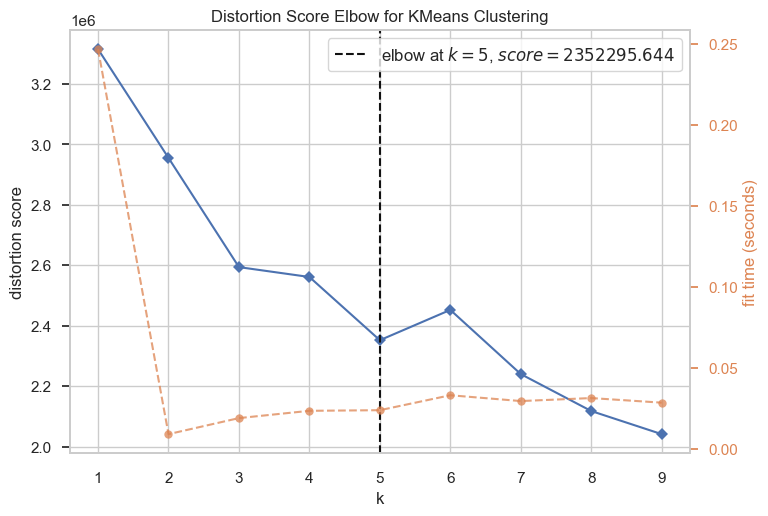

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(features_scaled)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [32]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(features_scaled)

silhouette_score(features_scaled, kmeans.labels_)

np.float64(0.11750545565327343)

In [33]:
cluster_range = range(2, 11)

silhouette_scores = []
inertia_scores = []

print("Menjalankan KMeans dan menghitung Silhouette Score...")
for k in cluster_range:
    try:
        # Inisialisasi dan jalankan KMeans
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(features_scaled)

        # Hitung silhouette score untuk seluruh dataset
        overall_score = silhouette_score(features_scaled, cluster_labels)
        silhouette_scores.append(overall_score)

        # Hitung silhouette score per baris
        sample_silhouette_values = silhouette_samples(features_scaled, cluster_labels)

        # Simpan inertia (distortion score)
        inertia_scores.append(kmeans.inertia_)

        # Tampilkan hasil untuk setiap iterasi k
        print(f"\nJumlah Cluster: {k} | Silhouette Score Keseluruhan: {overall_score:.4f} | Inertia: {kmeans.inertia_:.4f}")

    except Exception as e:
        print(f"Terjadi error untuk k={k}: {e}")
        silhouette_scores.append(None)

Menjalankan KMeans dan menghitung Silhouette Score...

Jumlah Cluster: 2 | Silhouette Score Keseluruhan: 0.1119 | Inertia: 2953612.9990

Jumlah Cluster: 3 | Silhouette Score Keseluruhan: 0.1666 | Inertia: 2594106.1699

Jumlah Cluster: 4 | Silhouette Score Keseluruhan: 0.1288 | Inertia: 2471692.8055

Jumlah Cluster: 5 | Silhouette Score Keseluruhan: 0.1269 | Inertia: 2351822.7122

Jumlah Cluster: 6 | Silhouette Score Keseluruhan: 0.1422 | Inertia: 2233161.6756

Jumlah Cluster: 7 | Silhouette Score Keseluruhan: 0.1663 | Inertia: 2109043.7865

Jumlah Cluster: 8 | Silhouette Score Keseluruhan: 0.1768 | Inertia: 2030241.7530

Jumlah Cluster: 9 | Silhouette Score Keseluruhan: 0.1941 | Inertia: 1932861.7643

Jumlah Cluster: 10 | Silhouette Score Keseluruhan: 0.2089 | Inertia: 1841932.5477


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

### PCA

In [34]:
# Reduksi dimensi ke 2D menggunakan PCA
pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(features_scaled)

# Konversi hasil PCA menjadi DataFrame
pca_columns = [f"PC{i+1}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(X_pca, columns=pca_columns)

# Menampilkan jumlah komponen utama yang dipilih
num_components = pca.n_components_
print(f"Jumlah komponen utama setelah PCA: {num_components}")

Jumlah komponen utama setelah PCA: 2


#### **Implementasi PCA dengan K-Means**

In [35]:
cluster_range = list(range(2, 11)) 

silhouette_scores = [
    silhouette_score(pca_df, KMeans(n_clusters=k, random_state=42, n_init=10).fit_predict(pca_df))
    for k in cluster_range
]

optimal_k = cluster_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k}")
print("Silhouette scores for each k:")
for k, score in zip(cluster_range, silhouette_scores):
    print(f"k={k}: {score}")

Optimal number of clusters: 6
Silhouette scores for each k:
k=2: 0.44889569951242636
k=3: 0.5503908688328085
k=4: 0.6438593967270434
k=5: 0.7604171107457557
k=6: 0.8968044205929382
k=7: 0.8657120627145679
k=8: 0.8222566090795339
k=9: 0.7539467420712858
k=10: 0.7473144038415177


In [36]:
# Apply K-Means clustering dengan optimal_k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels_optimal = kmeans_optimal.fit_predict(pca_df)

silhouette_optimal = silhouette_score(pca_df, labels_optimal)
print(f"Silhouette Score for optimal k after PCA: {silhouette_optimal}")

Silhouette Score for optimal k after PCA: 0.8968044205929382


In [37]:
print(f"Optimal number of clusters after PCA: {optimal_k}")

Optimal number of clusters after PCA: 6


In [38]:
# Melihat distribusi jumlah data per cluster
for cluster, count in sorted(collections.Counter(labels_optimal).items()):
    print(f"Cluster {cluster}: {count} data")

Cluster 0: 2168 data
Cluster 1: 2201 data
Cluster 2: 1143 data
Cluster 3: 2226 data
Cluster 4: 1136 data
Cluster 5: 1126 data


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_16796\1700588952.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], palette='tab10')


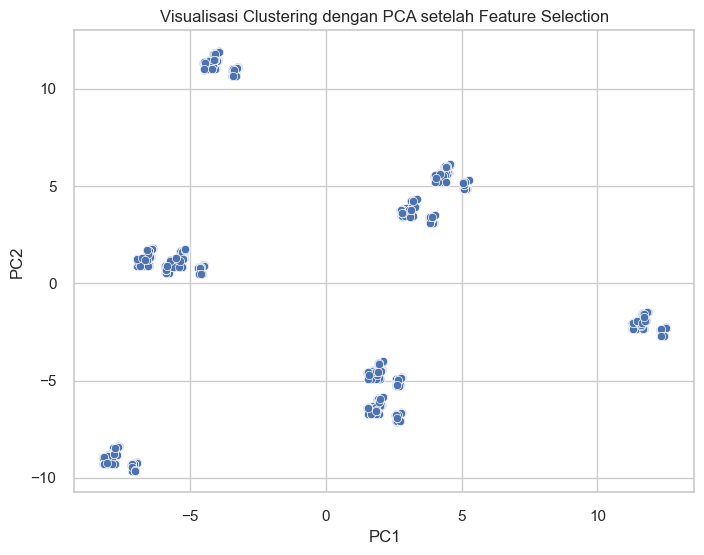

In [39]:

# Plot hasil clustering setelah PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], palette='tab10')
plt.title("Visualisasi Clustering dengan PCA setelah Feature Selection")
plt.show()

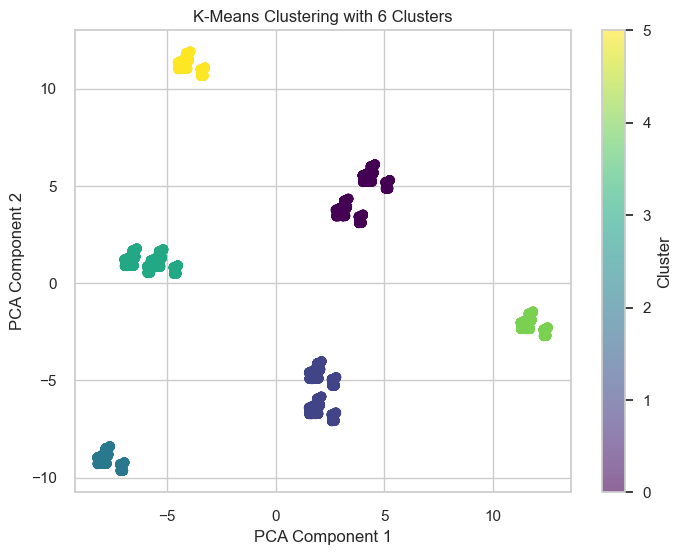

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=labels_optimal, cmap='viridis', alpha=0.6)
plt.colorbar(label="Cluster")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"K-Means Clustering with {optimal_k} Clusters")
plt.show()

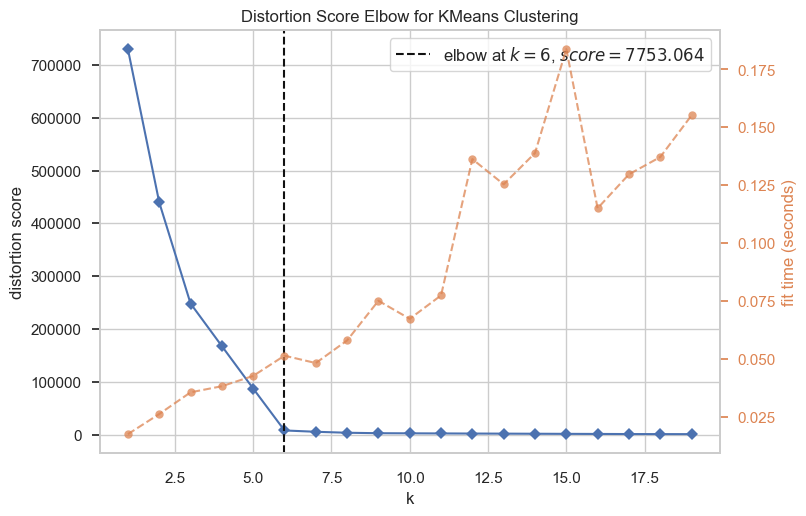

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 20))
visualizer.fit(pca_df)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [42]:
pca_df

,PC1,PC2
0,11.583612,-2.024880
1,3.853238,3.110348
2,12.389431,-2.398785
3,-5.745289,1.164001
4,-4.013839,11.494189
...,...,...
9995,-5.522781,1.280095
9996,1.914520,-4.576198
9997,4.050328,5.394773
9998,1.973015,-4.125887


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [43]:
# Inverse transform PCA
inverse_transformed_data = pca.inverse_transform(X_pca)
inverse_transformed_df = pd.DataFrame(inverse_transformed_data, columns=features_scaled.columns)
inverse_transformed_df

,Age,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Sleep Hours,Daily Calories Intake,Resting Heart Rate (bpm),BMI,...,Workout Intensity_High,Workout Intensity_Low,Workout Intensity_Medium,Mood Before Workout_Happy,Mood Before Workout_Neutral,Mood Before Workout_Stressed,Mood Before Workout_Tired,Mood After Workout_Energized,Mood After Workout_Fatigued,Mood After Workout_Neutral
0,-0.031205,-0.000303,-0.007656,-0.017739,-0.023504,0.024140,0.028538,-0.008336,0.019527,0.015831,...,4.894986,-5.415111,-4.679213,-1.824070,-3.060387,-2.823867,-2.690351,-5.475996,5.121802,-4.845144
1,-0.004148,0.011193,-0.013020,-0.005120,-0.017349,0.005076,0.009689,-0.004181,0.023853,0.005217,...,-0.146076,-4.480249,-0.573012,-2.473364,-2.755727,-2.567117,-2.602468,-1.046775,0.364975,-4.517538
2,-0.033735,-0.001166,-0.007509,-0.018874,-0.024553,0.025983,0.030521,-0.008821,0.019564,0.016947,...,5.394515,-5.578194,-5.015659,-1.762330,-3.092590,-2.843841,-2.699913,-5.855015,5.610252,-4.954574
3,0.014488,0.008200,0.001567,0.001199,0.011280,-0.011145,-0.014675,0.003643,0.004093,-0.008467,...,-5.066968,0.064977,-0.197347,-2.973122,-2.354488,-2.598424,-2.472641,0.189037,-5.159555,-0.228819
4,0.029062,0.029444,-0.026541,0.011269,-0.019049,-0.017152,-0.009128,-0.000965,0.037792,-0.005393,...,-5.784114,-4.813002,5.397778,-3.250413,-2.454388,-2.172987,-2.520887,5.078565,-4.620856,-5.657047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.014183,0.008417,0.001047,0.001132,0.010437,-0.010832,-0.014102,0.003439,0.004765,-0.008146,...,-4.964309,-0.069251,-0.165778,-2.964150,-2.363985,-2.594713,-2.475827,0.196750,-5.034745,-0.361343
9996,-0.013493,-0.004543,0.008546,-0.012037,0.006825,0.008328,0.003926,-0.000265,-0.002162,0.002010,...,0.032906,-0.596272,-4.635972,-2.305753,-2.654570,-2.880252,-2.558100,-4.533704,-0.416242,-0.249391
9997,-0.000497,0.015911,-0.019050,-0.002729,-0.023597,0.003400,0.010449,-0.005061,0.031037,0.005634,...,-0.405982,-5.486306,0.692950,-2.545745,-2.770156,-2.472056,-2.610718,0.077723,0.375434,-5.652495
9998,-0.012819,-0.003615,0.007338,-0.011583,0.005545,0.008035,0.004125,-0.000453,-0.000718,0.002120,...,-0.007615,-0.802270,-4.389452,-2.318852,-2.658224,-2.861617,-2.559982,-4.316611,-0.402691,-0.480035


In [44]:
# konversi ke quantile transformed
inverse_transformed_df[inverse_transformed_df.columns] = quantile_transformer.inverse_transform(inverse_transformed_df[inverse_transformed_df.columns])

inverse_transformed_df

,Age,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Sleep Hours,Daily Calories Intake,Resting Heart Rate (bpm),BMI,...,Workout Intensity_High,Workout Intensity_Low,Workout Intensity_Medium,Mood Before Workout_Happy,Mood Before Workout_Neutral,Mood Before Workout_Stressed,Mood Before Workout_Tired,Mood After Workout_Energized,Mood After Workout_Fatigued,Mood After Workout_Neutral
0,0.487805,0.497168,0.502168,0.494949,0.487329,0.514565,0.500000,0.498238,0.512821,0.378065,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.487805,0.504587,0.499790,0.494949,0.489866,0.507947,0.500000,0.500067,0.512821,0.376229,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.487805,0.495575,0.502233,0.494949,0.486903,0.515072,0.511035,0.497971,0.512821,0.378329,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.512195,0.504587,0.506118,0.505051,0.501589,0.501758,0.483333,0.502562,0.487179,0.374509,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.512195,0.513761,0.493882,0.505051,0.489379,0.499769,0.497703,0.501093,0.512821,0.375250,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.512195,0.504587,0.506026,0.505051,0.501356,0.501891,0.483333,0.502497,0.487179,0.374609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.487805,0.495413,0.509246,0.494949,0.500137,0.509141,0.500000,0.501316,0.487179,0.376017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.487805,0.504587,0.497117,0.499116,0.487291,0.507486,0.500000,0.499786,0.512821,0.376255,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.487805,0.495413,0.508174,0.494949,0.499617,0.509018,0.500000,0.501256,0.487179,0.376025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# konversi ke MinMaxScaler
inverse_transformed_df[inverse_transformed_df.columns] = scaler.inverse_transform(inverse_transformed_df[inverse_transformed_df.columns])

inverse_transformed_df.sample(3)

,Age,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Sleep Hours,Daily Calories Intake,Resting Heart Rate (bpm),BMI,...,Workout Intensity_High,Workout Intensity_Low,Workout Intensity_Medium,Mood Before Workout_Happy,Mood Before Workout_Neutral,Mood Before Workout_Stressed,Mood Before Workout_Tired,Mood After Workout_Energized,Mood After Workout_Fatigued,Mood After Workout_Neutral
824,38.0,64.0,558.000000,129.0,10498.171295,7.898376,7.000000,2752.495510,69.0,27.768162,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8272,39.0,65.0,555.000000,130.0,10545.926373,7.757294,6.900000,2757.243496,69.0,27.692347,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1421,39.0,66.0,544.097015,130.0,10302.461378,7.744674,6.956742,2752.419465,70.0,27.733514,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [46]:
feature_construction = ['BMI',
                        'Calories Burned per Minute',
                        'Steps per Minute',
                        'Steps per Km'
                        ]

interpretasi_df = dataset.copy()
interpretasi_df.drop(columns=[
    'User ID'
    ], inplace=True)

pca_df["Cluster"] = labels_optimal
interpretasi_df[feature_construction] = inverse_transformed_df[feature_construction]
interpretasi_df['Cluster'] = pca_df['Cluster']
interpretasi_df.sample(5).T


,7126,8258,7721,2440,3283
Age,27,28,51,33,46
Gender,Female,Other,Other,Female,Male
Height (cm),177,159,166,164,197
Weight (kg),80,107,67,96,117
Workout Type,Cycling,Running,Cycling,Strength,Strength
Workout Duration (mins),36,98,26,73,113
Calories Burned,354,101,721,274,149
Heart Rate (bpm),141,80,106,131,137
Steps Taken,3936,2642,1989,1461,10355
Distance (km),11.07,4.73,10.36,5.66,11.33


In [47]:
pca_df

,PC1,PC2,Cluster
0,11.583612,-2.024880,4
1,3.853238,3.110348,0
2,12.389431,-2.398785,4
3,-5.745289,1.164001,3
4,-4.013839,11.494189,5
...,...,...,...
9995,-5.522781,1.280095,3
9996,1.914520,-4.576198,1
9997,4.050328,5.394773,0
9998,1.973015,-4.125887,1


In [ ]:
def analyze_clusters(df):
    # Analisis numerik (Mean, Min, Max)
    numerical_features = (
        df.select_dtypes(include=["number"])
        .groupby("Cluster")
        .agg(["mean", "min", "max"])
        .reset_index()
    )

    # Analisis kategorikal (Modus)
    categorical_columns = df.select_dtypes(exclude=["number"]).columns.tolist()
    
    if categorical_columns:  # Pastikan ada kolom kategorikal sebelum diproses
        categorical_features = (
            df[categorical_columns + ["Cluster"]].copy()
            .groupby("Cluster")
            .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
            .reset_index()
        )
    else:
        categorical_features = pd.DataFrame()  # Jika tidak ada, buat DataFrame kosong
    
    # Gabungkan hasil analisis jika ada data kategorikal
    if not categorical_features.empty:
        cluster_analysis = pd.concat([numerical_features.set_index("Cluster"), 
                                      categorical_features.set_index("Cluster")], axis=1)
    else:
        cluster_analysis = numerical_features.set_index("Cluster")

    # Tampilkan hasil
    return cluster_analysis.T

# Panggil fungsi
cluster_analysis = analyze_clusters(interpretasi_df)
display(cluster_analysis)



Cluster,0,1,2,3,4,5
"(Age, mean)",38.49262,38.878692,38.387577,37.765499,37.90581,38.963588
"(Age, min)",18,18,18,18,18,18
"(Age, max)",59,59,59,59,59,59
"(Height (cm), mean)",173.75738,173.818719,174.636045,174.89398,174.633803,174.212256
"(Height (cm), min)",150,150,150,150,150,150
"(Height (cm), max)",199,199,199,199,199,199
"(Weight (kg), mean)",85.047509,84.715584,85.608049,84.540431,85.035211,84.858792
"(Weight (kg), min)",50,50,50,50,50,50
"(Weight (kg), max)",119,119,119,119,119,119
"(Workout Duration (mins), mean)",65.171587,63.552476,64.185477,64.806828,64.988556,63.966252


# 📊 Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## 🟢 Cluster 0:
- Gender: Male
- Workout Type: HIIT
- Workout Intensity: Medium
- Mood Before Workout: Tired
- Mood After Workout: Fatigued
  - Karakteristik Rata-rata:
    - Usia rata-rata 38.49 tahun (rentang 18-59 tahun).
    - Tinggi badan rata-rata 173.75 cm, berat badan 85.05 kg, dan BMI 27.77.
    - Durasi latihan: 65.17 menit, membakar rata-rata 542 kalori.
    - Langkah rata-rata cukup tinggi (10,286 langkah/hari).
    - Detak jantung rata-rata 129 bpm saat latihan, 69 bpm saat istirahat.
    - Tidur rata-rata 7 jam, cukup sehat.
    - Intake air stabil di 1.9 liter/hari.
    - Setelah latihan, mereka merasa lebih lelah (fatigued).

**Analisis**:
Cluster ini mencakup individu dengan usia menengah yang cukup aktif dalam latihan. Mereka memiliki durasi latihan tinggi, membakar kalori lebih banyak, dan rata-rata memiliki langkah harian yang tinggi. Namun, mereka cenderung merasa lelah setelah latihan.

---

## 🔴 Cluster 1:
- Gender: Male
- Workout Type: Running
- Workout Intensity: High
- Mood Before Workout: Happy
- Mood After Workout: Neutral
  - Karakteristik Rata-rata:
    - Usia rata-rata 38.87 tahun.
    - Tinggi badan rata-rata 173.81 cm, berat badan 84.71 kg, dan BMI 27.76.
    - Durasi latihan: 63.55 menit, membakar 559.56 kalori.
    - Langkah tertinggi dibanding cluster lain (10,485 langkah/hari).
    - Detak jantung saat latihan 129 bpm, saat istirahat 69 bpm.
    - Tidur rata-rata 6.99 jam, cukup sehat.
    - Mood sebelum latihan bahagia, setelah latihan netral.

**Analisis**:
Cluster ini terdiri dari individu yang juga aktif secara fisik dengan kebiasaan latihan yang mirip dengan Cluster 1. Mereka membakar kalori lebih tinggi dan memiliki jumlah langkah yang lebih banyak. Mereka memiliki waktu tidur yang sedikit lebih rendah tetapi tetap dalam kisaran sehat. Mood setelah latihan cenderung netral.

---

## 🟠 Cluster 2:
- Gender: Male
- Workout Type: Cardio
- Workout Intensity: Low
- Mood Before Workout: Tired
- Mood After Workout: Neutral
  - Karakteristik Rata-rata:
    - Usia rata-rata 38.38 tahun.
    - Tinggi 174.63 cm, berat 85.60 kg, BMI 27.67.
    - Durasi latihan: 64.18 menit, membakar 556.15 kalori.
    - Langkah per hari tertinggi (10,854 langkah).
    - Detak jantung saat latihan 129 bpm, saat istirahat 69 bpm.
    - Tidur 6.97 jam, cukup normal.
    - Mood sebelum latihan lelah, setelah latihan netral.

**Analisis**:
Cluster ini terdiri dari individu yang aktif dalam latihan kardio dengan pola latihan yang cukup teratur. Mereka memiliki jumlah langkah dan jarak tempuh yang tinggi. Yang menarik, mereka cenderung merasa lebih bahagia setelah latihan, menunjukkan bahwa latihan ini meningkatkan suasana hati mereka.

---

## 🟡 Cluster 3:
- Gender: Other
- Workout Type: HIIT
- Workout Intensity: Low
- Mood Before Workout: Neutral
- Mood After Workout: Energized
  - Karakteristik Rata-rata:
    - Usia rata-rata 37.76 tahun.
    - Tinggi 174.89 cm, berat 84.54 kg, BMI 27.70.
    - Durasi latihan: 64.80 menit, membakar 546.36 kalori.
    - Langkah per hari 10,355.
    - Detak jantung saat latihan 129 bpm, saat istirahat 69 bpm.
    - Tidur 6.96 jam, hampir normal.
    - Mood setelah latihan meningkat menjadi energized.

**Analisis**:
Cluster ini mencakup individu yang melakukan latihan dengan intensitas tinggi (HIIT) dan membakar kalori paling banyak. Mereka memiliki jarak tempuh yang lebih jauh dan meskipun tidur lebih sedikit, mereka cenderung merasa berenergi setelah latihan.

---

## 🔵 Cluster 4:
- Gender: Other
- Workout Type: Strength Training
- Workout Intensity: High
- Mood Before Workout: Happy
- Mood After Workout: Fatigued
  - Karakteristik Rata-rata:
    - Usia rata-rata 37.90 tahun.
    - Tinggi 174.63 cm, berat 85.03 kg, BMI 27.85.
    - Durasi latihan: 64.98 menit, membakar 553.47 kalori.
    - Langkah per hari 10,414.
    - Detak jantung saat latihan 129 bpm, saat istirahat 69 bpm.
    - Tidur 6.98 jam.
    - Mood sebelum latihan bahagia, setelah latihan lelah (fatigued).

**Analisis**:
Cluster ini terdiri dari individu yang fokus pada latihan kekuatan. Mereka membakar kalori dalam jumlah tinggi tetapi cenderung merasa lelah setelah latihan. Jarak tempuh mereka sedikit lebih rendah dibandingkan cluster lain, yang sesuai dengan pola latihan kekuatan yang tidak terlalu berbasis kardio.

---

## 🟣 Cluster 5:
- Gender: Other
- Workout Type: Yoga
- Workout Intensity: Medium
- Mood Before Workout: Stressed
- Mood After Workout: Energized
  - Karakteristik Rata-rata:
    - Usia rata-rata 38.96 tahun.
    - Tinggi 174.21 cm, berat 84.85 kg, BMI 27.73.
    - Durasi latihan: 63.96 menit, membakar 562.67 kalori.
    - Langkah per hari 10,554.
    - Detak jantung saat latihan 130 bpm, saat istirahat 69 bpm.
    - Tidur 6.96 jam.
    - Mood sebelum latihan stres, setelah latihan energik.

**Analisis**:
Cluster ini mencakup individu yang lebih banyak melakukan latihan berbasis keseimbangan dan fleksibilitas seperti yoga. Mereka masih membakar kalori dalam jumlah tinggi, tetapi perbedaan utamanya adalah mereka merasa lebih segar dan berenergi setelah latihan.

---

## Kesimpulan
1. Cluster 1 dan 5 cenderung merasa lelah setelah latihan, menunjukkan mereka lebih banyak melakukan latihan intensitas tinggi yang menguras energi.
2. Cluster 3 dan 4 lebih bahagia dan energik setelah latihan, menunjukkan latihan mereka mungkin lebih seimbang.
3. Cluster 6 adalah satu-satunya kelompok yang melakukan latihan berbasis keseimbangan dan fleksibilitas.
4. Cluster 4 memiliki pembakaran kalori tertinggi, sedangkan Cluster 5 memiliki pembakaran kalori yang cukup tinggi tetapi cenderung lebih melelahkan.

---

In [49]:
# Menggabungkan fitur cluster ke dalam dataset yang akan di eksport
inverse_transformed_df["Cluster"] = pca_df["Cluster"]
inverse_transformed_df.head().T

,0,1,2,3,4
Age,38.000000,38.000000,38.000000,39.000000,39.000000
Workout Duration (mins),64.191338,65.000000,64.017717,65.000000,66.000000
Calories Burned,551.448891,549.311079,551.507535,555.000000,544.000000
Heart Rate (bpm),129.000000,129.000000,129.000000,130.000000,130.000000
Steps Taken,10258.273060,10306.467548,10250.181755,10529.182876,10297.225771
Distance (km),7.961198,7.865230,7.968540,7.775495,7.746647
Sleep Hours,7.000000,7.000000,7.066211,6.900000,6.986215
Daily Calories Intake,2745.096438,2749.667018,2744.430525,2755.903512,2752.230811
Resting Heart Rate (bpm),70.000000,70.000000,70.000000,69.000000,70.000000
BMI,27.847974,27.774016,27.858602,27.704780,27.734599


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:

inverse_transformed_df.to_csv("klasifikasi_dataset.csv", index=False)